# Chapter 5 - Basic Math and Statistics

## Segment 5 - Starting with parametric methods in pandas and scipy

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy
from scipy.stats import pearsonr

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 8, 4
plt.style.use('seaborn-whitegrid')

### The Pearson Correlation

In [5]:
address = '../Data/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.head()

car_names   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

In [6]:
sb.pairplot(cars)

In [7]:
x = cars[['mpg','hp','qsec','wt']]
sb.pairplot(x)

### Using scipy to calculate the Pearson correlation coefficient

In [8]:
mpg = cars['mpg']
hp = cars['hp']
qsec = cars['qsec']
wt = cars['wt']

pearsonr_coefficient, p_value = pearsonr(mpg, hp)
print(f'PearsonR Correlation Coefficient {pearsonr_coefficient}')

PearsonR Correlation Coefficient -0.7761683718265863


In [9]:
pearsonr_coefficient, p_value = pearsonr(mpg, qsec)
print(f'PearsonR Correlation Coefficient {pearsonr_coefficient}')

PearsonR Correlation Coefficient 0.4186840339217782


In [10]:
pearsonr_coefficient, p_value = pearsonr(mpg, wt)
print(f'PearsonR Correlation Coefficient {pearsonr_coefficient}')

PearsonR Correlation Coefficient -0.8676593765172278


### Using pandas to calculate the Pearson correlation coefficient

In [12]:
corr = x.corr()
corr

mpg        hp      qsec        wt
mpg   1.000000 -0.776168  0.418684 -0.867659
hp   -0.776168  1.000000 -0.708223  0.658748
qsec  0.418684 -0.708223  1.000000 -0.174716
wt   -0.867659  0.658748 -0.174716  1.000000

### Using Seaborn to visualize the Pearson correlation coefficient

<AxesSubplot:>

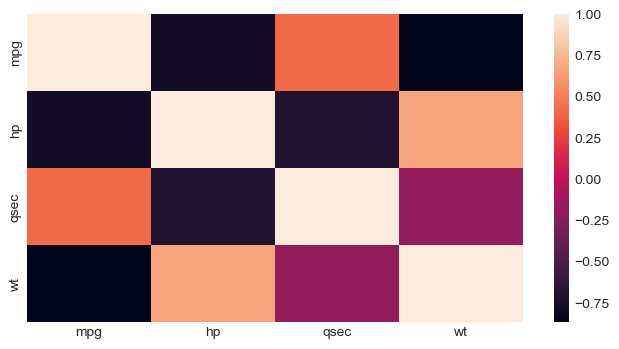

In [17]:
sb.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [23]:
car_groups = cars.groupby(by='car_names')
car_groups.first()

mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
car_names                                                                      
AMC Javelin          15.2    8  304.0  150  3.15  3.435  17.30   0   0     3   
Cadillac Fleetwood   10.4    8  472.0  205  2.93  5.250  17.98   0   0     3   
Camaro Z28           13.3    8  350.0  245  3.73  3.840  15.41   0   0     3   
Chrysler Imperial    14.7    8  440.0  230  3.23  5.345  17.42   0   0     3   
Datsun 710           22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Dodge Challenger     15.5    8  318.0  150  2.76  3.520  16.87   0   0     3   
Duster 360           14.3    8  360.0  245  3.21  3.570  15.84   0   0     3   
Ferrari Dino         19.7    6  145.0  175  3.62  2.770  15.50   0   1     5   
Fiat 128             32.4    4   78.7   66  4.08  2.200  19.47   1   1     4   
Fiat X1-9            27.3    4   79.0   66  4.08  1.935  18.90   1   1     4   
Ford Pantera L       15.8    8  351.0  264  4.22  3.170  14.50   0   1     5   
Honda Civic          30.4    4   75.7   52  4.93  1.615  18.52   1   1     4   
Hornet 4 Drive       21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout    18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   
Lincoln Continental  10.4    8  460.0  215  3.00  5.424  17.82   0   0     3   
Lotus Europa         30.4    4   95.1  113  3.77  1.513  16.90   1   1     5   
Maserati Bora        15.0    8  301.0  335  3.54  3.570  14.60   0   1     5   
Mazda RX4            21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag        21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Merc 230             22.8    4  140.8   95  3.92  3.150  22.90   1   0     4   
Merc 240D            24.4    4  146.7   62  3.69  3.190  20.00   1   0     4   
Merc 280             19.2    6  167.6  123  3.92  3.440  18.30   1   0     4   
Merc 280C            17.8    6  167.6  123  3.92  3.440  18.90   1   0     4   
Merc 450SE           16.4    8  275.8  180  3.07  4.070  17.40   0   0     3   
Merc 450SL           17.3    8  275.8  180  3.07  3.730  17.60   0   0     3   
Merc 450SLC          15.2    8  275.8  180  3.07  3.780  18.00   0   0     3   
Pontiac Firebird     19.2    8  400.0  175  3.08  3.845  17.05   0   0     3   
Porsche 914-2        26.0    4  120.3   91  4.43  2.140  16.70   0   1     5   
Toyota Corolla       33.9    4   71.1   65  4.22  1.835  19.90   1   1     4   
Toyota Corona        21.5    4  120.1   97  3.70  2.465  20.01   1   0     3   
Valiant              18.1    6  225.0  105  2.76  3.460  20.22   1   0     3   
Volvo 142E           21.4    4  121.0  109  4.11  2.780  18.60   1   1     4   

                     carb  
car_names                  
AMC Javelin             2  
Cadillac Fleetwood      4  
Camaro Z28              4  
Chrysler Imperial       4  
Datsun 710              1  
Dodge Challenger        2  
Duster 360              4  
Ferrari Dino            6  
Fiat 128                1  
Fiat X1-9               1  
Ford Pantera L          4  
Honda Civic             2  
Hornet 4 Drive          1  
Hornet Sportabout       2  
Lincoln Continental     4  
Lotus Europa            2  
Maserati Bora           8  
Mazda RX4               4  
Mazda RX4 Wag           4  
Merc 230                2  
Merc 240D               2  
Merc 280                4  
Merc 280C               4  
Merc 450SE              3  
Merc 450SL              3  
Merc 450SLC             3  
Pontiac Firebird        2  
Porsche 914-2           2  
Toyota Corolla          1  
Toyota Corona           1  
Valiant                 1  
Volvo 142E              2